# Lab 4: Association Rule Mining with Apriori

**Objective:**  
Apply the Apriori algorithm to discover frequent itemsets and association rules in a real retail dataset.

## 1. Explore & Clean Data
We are using the UK Online Retail dataset. Each row is a transaction. Let's load and explore the data.

In [1]:
!pip install mlxtend pandas matplotlib seaborn openpyxl --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Load UK Online Retail dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Drop rows with missing values and filter for United Kingdom only
df = df.dropna()
df = df[df['Country'] == 'United Kingdom']
df = df[df['Quantity'] > 0]
df = df[df['InvoiceNo'].astype(str).str.startswith('5')]  # Only purchases
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Apply Apriori Algorithm
Convert the data to a format suitable for Apriori.

In [4]:
basket = (df[df['InvoiceDate'].dt.year == 2010]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().fillna(0))

# Encode quantities as 1s and 0s
def encode(x): return 1 if x >= 1 else 0
basket_sets = basket.applymap(encode)
basket_sets.head()

/tmp/ipython-input-4-1493575654.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
196,0.151820,(WHITE HANGING HEART T-LIGHT HOLDER)
68,0.102246,(HAND WARMER BABUSHKA DESIGN)
119,0.100697,(PAPER CHAIN KIT 50'S CHRISTMAS )
165,0.099148,(SCOTTIE DOG HOT WATER BOTTLE)
153,0.093726,(REGENCY CAKESTAND 3 TIER)


### Reflection:
Lowering `min_support` returns more itemsets but may include noise. Increasing it limits results to only highly frequent items.

## 3. Interpret Rules
We generate rules sorted by lift.

In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
138,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.027885,0.031758,0.022463,0.805556,25.365176,1.0,0.021578,4.979529,0.988130,0.604167,0.799178,0.756436
143,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.031758,0.027885,0.022463,0.707317,25.365176,1.0,0.021578,3.321392,0.992083,0.604167,0.698921,0.756436
140,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE KITCHEN),0.025562,0.035631,0.022463,0.878788,24.663373,1.0,0.021552,7.956042,0.984623,0.580000,0.874309,0.754611
139,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE BEDROOM ),0.025562,0.035631,0.022463,0.878788,24.663373,1.0,0.021552,7.956042,0.984623,0.580000,0.874309,0.754611
141,(POPPY'S PLAYHOUSE KITCHEN),"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",0.035631,0.025562,0.022463,0.630435,24.663373,1.0,0.021552,2.636716,0.994904,0.580000,0.620740,0.754611


## 4. Network Visualization of Top Rules

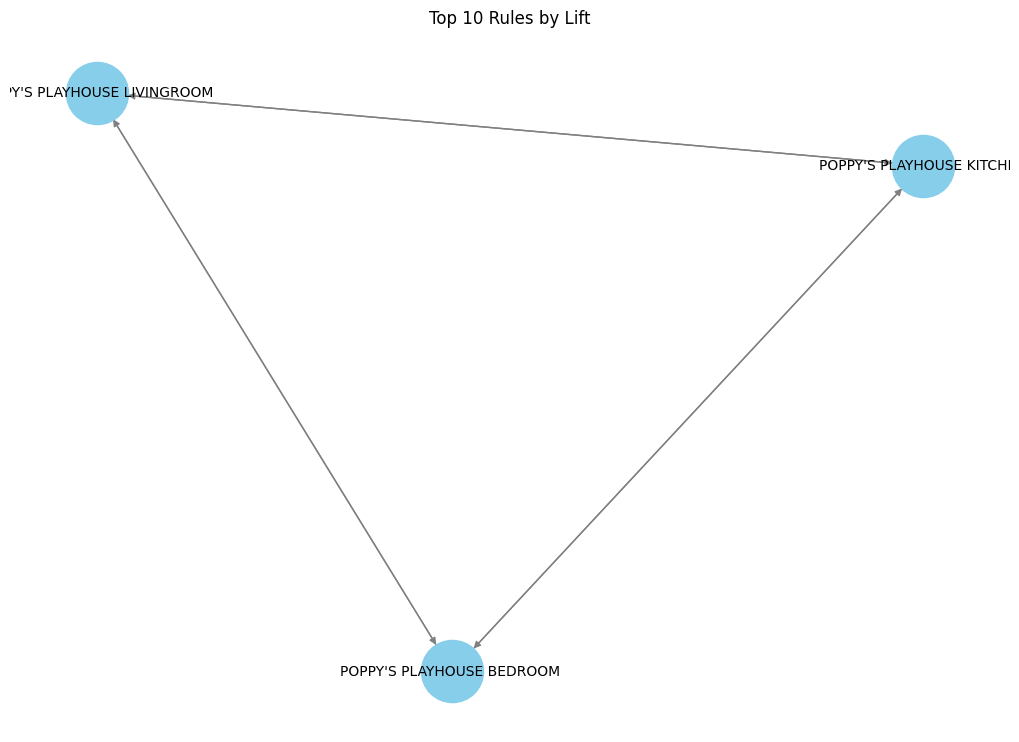

In [7]:
import networkx as nx
plt.figure(figsize=(10,7))
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
G = nx.DiGraph()

for _, rule in top_rules.iterrows():
    for ant in rule['antecedents']:
        for con in rule['consequents']:
            G.add_edge(ant, con, weight=rule['lift'])

pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, edge_color='gray')
plt.title("Top 10 Rules by Lift")
plt.show()

## 5. Retail Use Case Reflection
These rules can guide promotions or product placement. For example, if customers who buy ‘bread’ often buy ‘butter’, a retailer might bundle them together or place them near each other in-store.